In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

# Generating uniform (cartesian) numbers

In [2]:
r=1
x_circle=np.linspace(-1,1,100)
y_circle=np.sqrt(r**2-x_circle**2)
x_circle=np.concatenate([x_circle,x_circle[::-1]])
y_circle=np.concatenate([y_circle,-y_circle])

In [3]:
def gen_cart_circle(n,interval=(-1,1),batch=30,r=1):
    points=np.random.uniform(interval[0],interval[1],(batch,2))
    v_flag=np.linalg.norm(points,axis=1)<r
    valid_points=points[v_flag]
    while valid_points.shape[0]<n:
        points=np.random.uniform(interval[0],interval[1],(batch,2))
        v_flag=np.linalg.norm(points,axis=1)<r
        valid_points=np.concatenate([valid_points,points[v_flag]],axis=0)
    return valid_points[:n]

In [4]:
x_lines=np.hstack([np.linspace(-1,1,100).reshape(-1,1),np.ones((100,1))])

In [5]:
def get_line_params(point):
    rot=np.array([[np.cos(np.pi/2),-np.sin(np.pi/2)],
                  [np.sin(np.pi/2), np.cos(np.pi/2)]])
    dir_vec=rot.dot(point)
    dir_vec=dir_vec/np.linalg.norm(dir_vec)
    m=dir_vec[1]/dir_vec[0]
    return np.array([m,-m*point[0]+point[1]])

In [6]:
points=gen_cart_circle(200)

In [7]:
params=[get_line_params(p.reshape(-1,1)) for p in points]

In [8]:
all_lines=[x_lines.dot(i) for i in params]

(-1, 1)

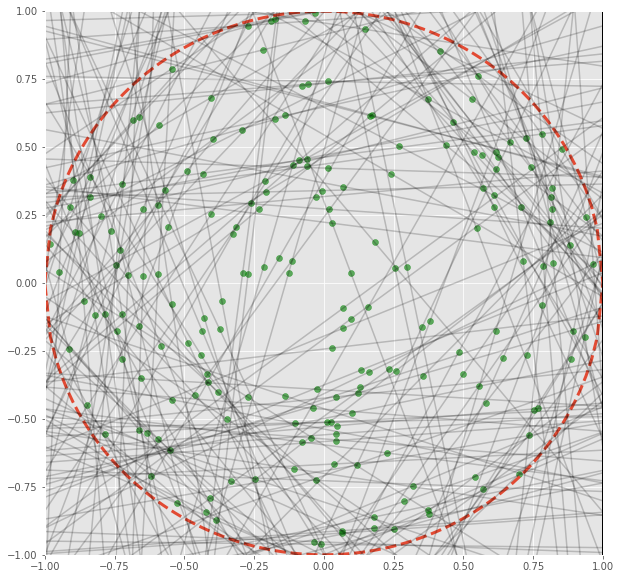

In [9]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(x_circle,y_circle, "--",linewidth=3)
ax.scatter(points[:,0],points[:,1],c="g",alpha=0.6)
for line in all_lines:
    ax.plot(x_lines,line.flatten(),"k",alpha=0.2)
ax.set_ylim([-1,1]);ax.set_xlim([-1,1])

In [10]:
def gen_pol_points(n,r=1,eps=1e-7):
    r_rands=np.random.uniform(eps,1,(n,1))
    rad_rands=np.random.uniform(0,2*np.pi,(n,1))
    x=r_rands*np.cos(rad_rands);y=r_rands*np.sin(rad_rands)
    return np.hstack([x,y])

In [11]:
points=gen_pol_points(200)

In [12]:
params=[get_line_params(p.reshape(-1,1)) for p in points]

In [13]:
all_lines=[x_lines.dot(i) for i in params]

(-1, 1)

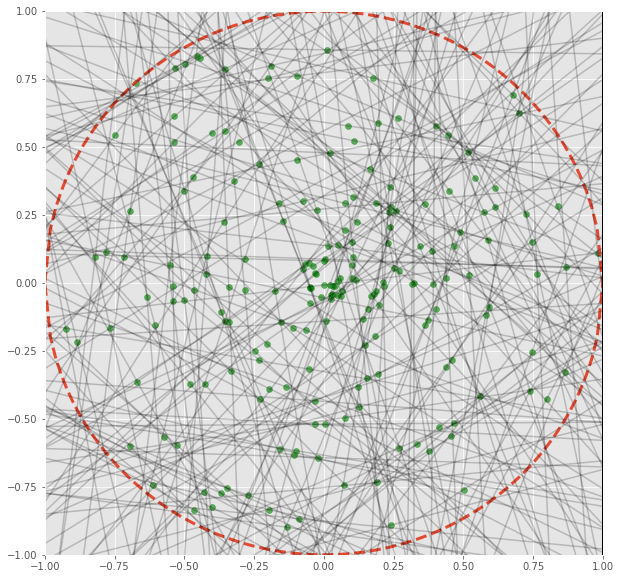

In [14]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(x_circle,y_circle, "--",linewidth=3)
ax.scatter(points[:,0],points[:,1],c="g",alpha=0.6)
for line in all_lines:
    ax.plot(x_lines,line.flatten(),"k",alpha=0.2)
ax.set_ylim([-1,1]);ax.set_xlim([-1,1])